In [503]:
#!pip install missingno

In [504]:
#!pip install plotly

In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno   # 결측치 시각화 하는 방법
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

plt.style.use('seaborn')
sns.set(font_scale = 2.5)   # graph의 font size 

In [506]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [507]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [508]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- Categorical Features : Sex,Embarked
- Ordinal Features : PClass
- Continous Features : Age, Fare
- Discrete Features : SibSip

## <흐름>
## 1) EDA
## 2) Data Preprocess / Feature Engineering
## 3) Single Model
## 4) Stacking

# [EDA]

## 1. Null data check

In [509]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [510]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [511]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


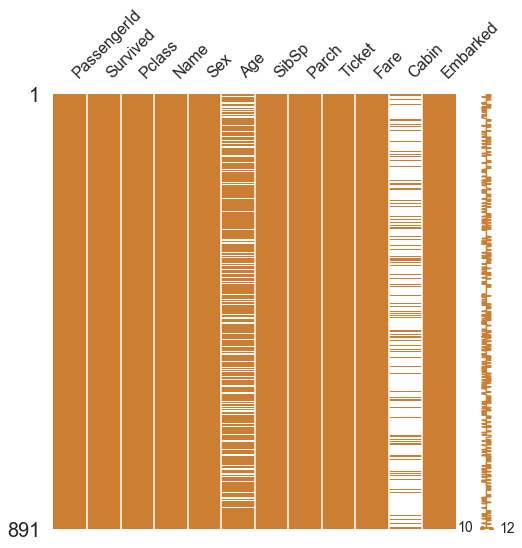

In [512]:
msno.matrix(df = df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

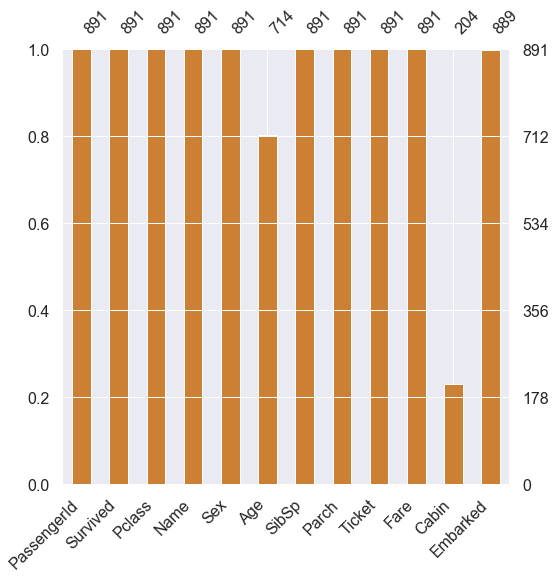

In [513]:
msno.bar(df = df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

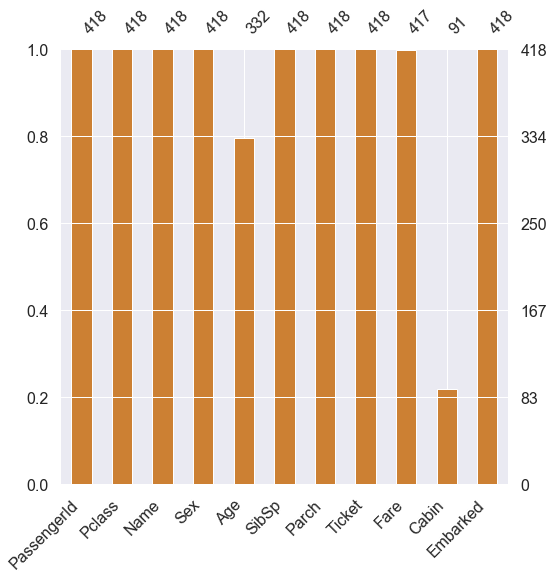

In [514]:
msno.bar(df = df_test.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

> Null data : Age, Cabin, Embarked

## 2. Target label 확인

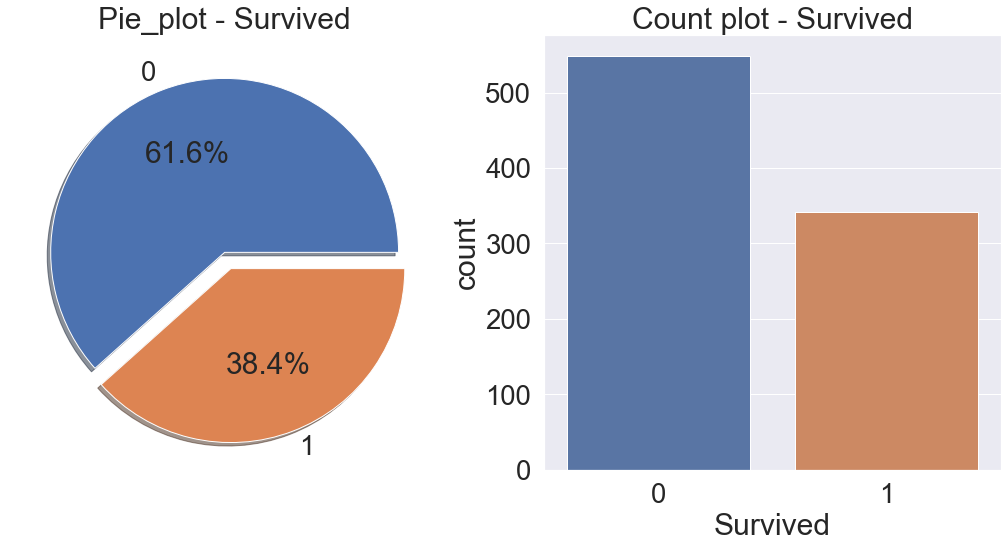

In [515]:
f, ax = plt.subplots(1, 2, figsize = (18,8)) # 기본 모눈 종이 그려주는 거 
# 왼쪽 그래프
df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie_plot - Survived')
ax[0].set_ylabel('')

# 오른쪽 그래프
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()  # --> 이거 안 써도 나옴.->?

> 죽은 사람(0)이 61.6%로 더 많다.

## 3. 변수 확인

### 1) Pclass

In [516]:
# Pclass 별 사람 수
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [517]:
# Pclass 별 생존자 수
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [518]:
# Pclass 별 생존률
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [519]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


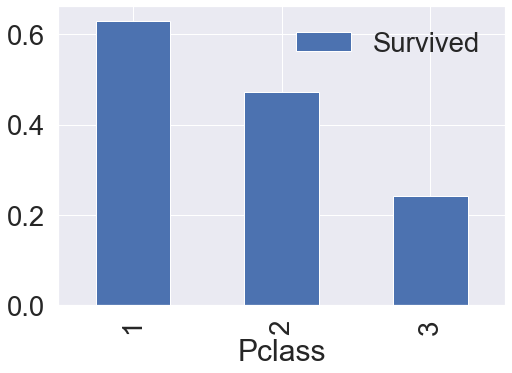

In [520]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

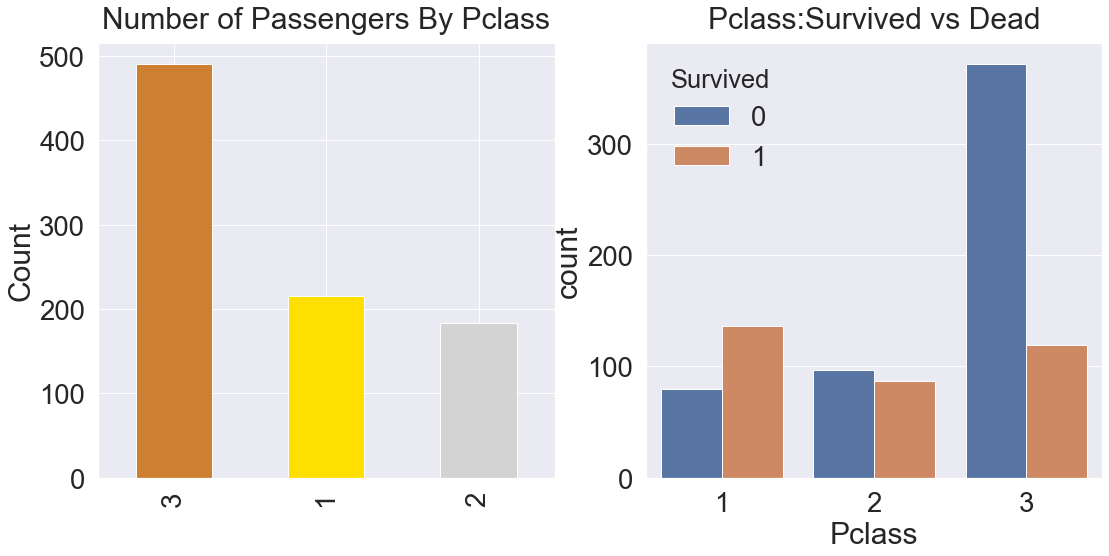

In [521]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax =ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead', y=y_position)

plt.show()

> 클래스가 높을 수록, 생존 확률이 높다.

### 2) Sex

In [522]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [523]:
# Sex 별 생존률
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [524]:
pd.crosstab(df_train['Sex'],df_train['Survived'], margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


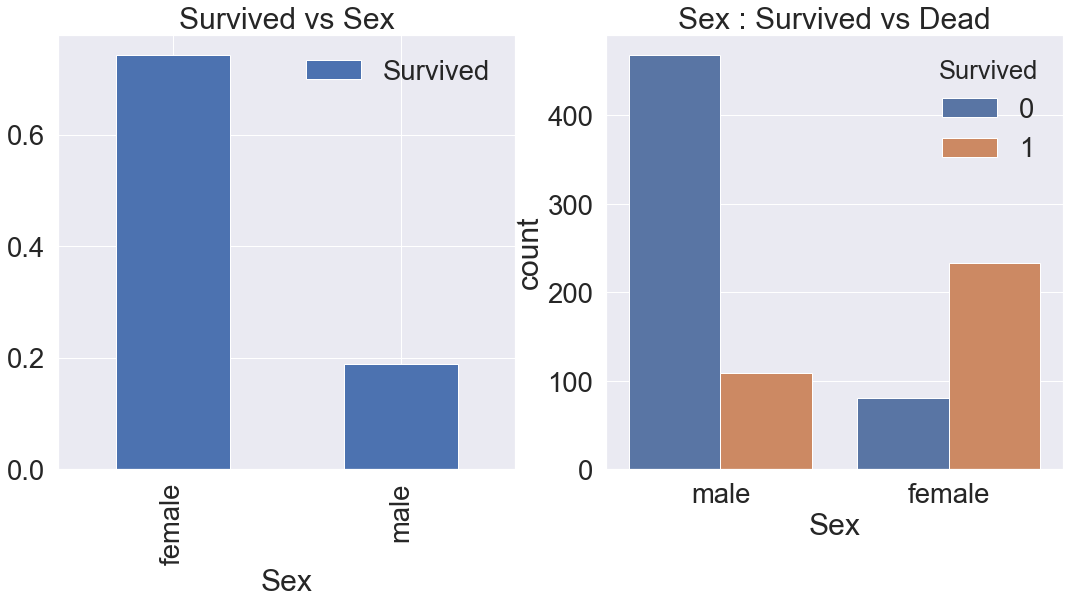

In [525]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

### 3) Pclass, Sex

In [526]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

- seaborn 의 factorplot이용 : 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

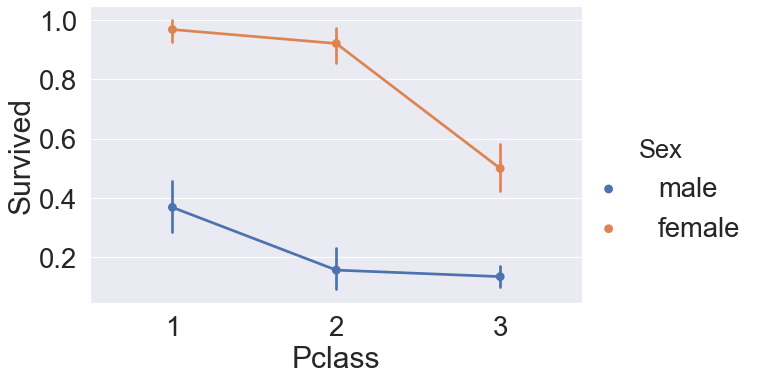

In [527]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

> - 모든 클래스에서 female 이 살 확률이 male 보다 높다.
- 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높다.

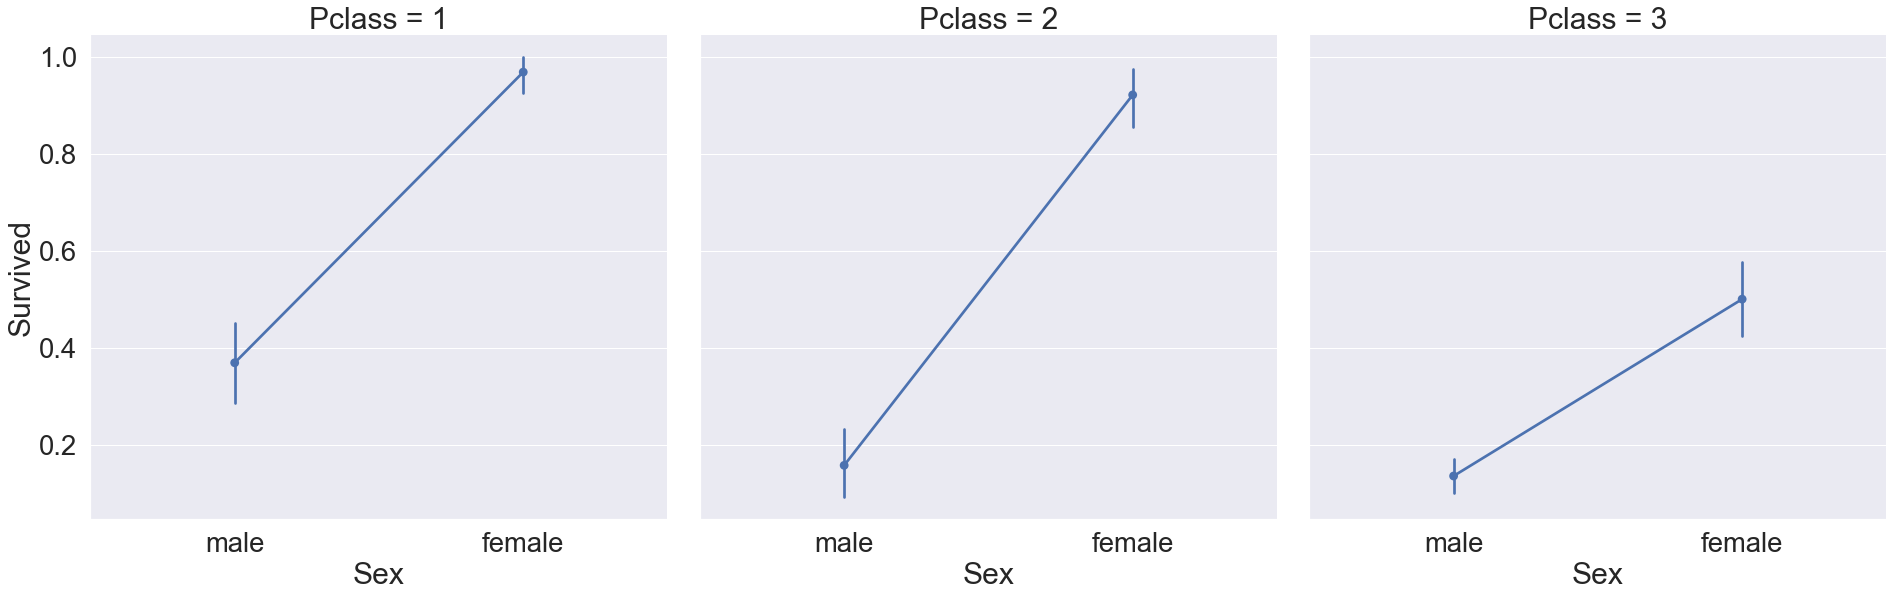

In [528]:
# hue 대신 column 으로 그리기
sns.factorplot(x='Sex', y = 'Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

### 4) Age

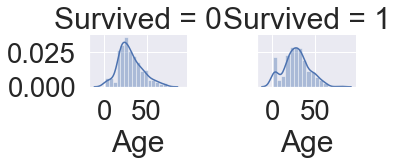

In [529]:
g = sns.FacetGrid(df_train, col='Survived')
g = g.map(sns.distplot, "Age")

In [530]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


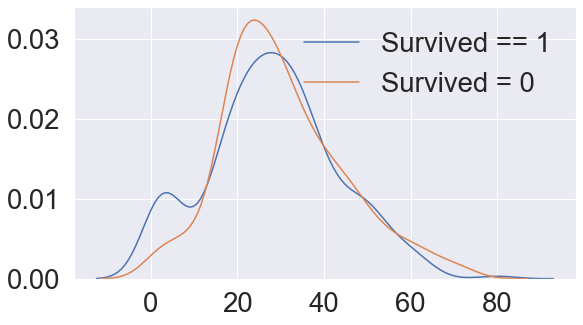

In [531]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived = 0'])
plt.show()

#### Pclass 별 나이 분포

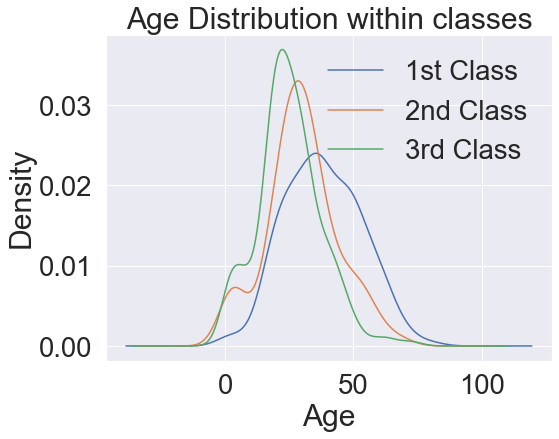

In [532]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

> Class 가 높을 수록 나이 많은 사람의 비중이 커짐

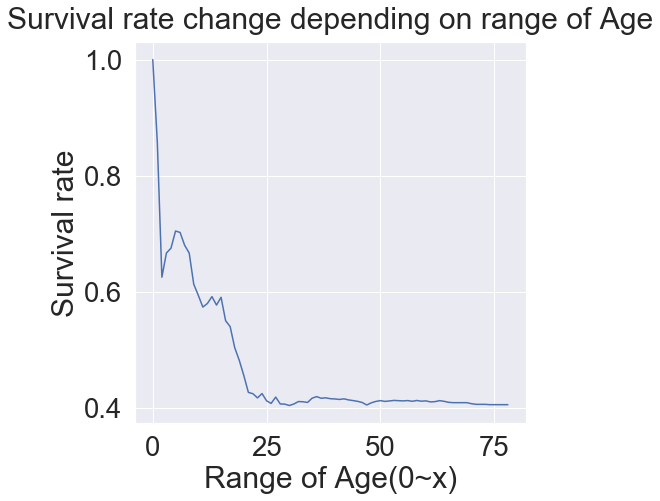

In [533]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

> 나이가 어릴 수록 생존률이 확실히 높다.

### 5) Pclass, Sex, Age

- seaborn 의 violinplot 
  - x축 : 나눠서 보고싶어하는 case(Pclass, Sex)
  - y축 : 보고 싶어하는 distribution(Age)

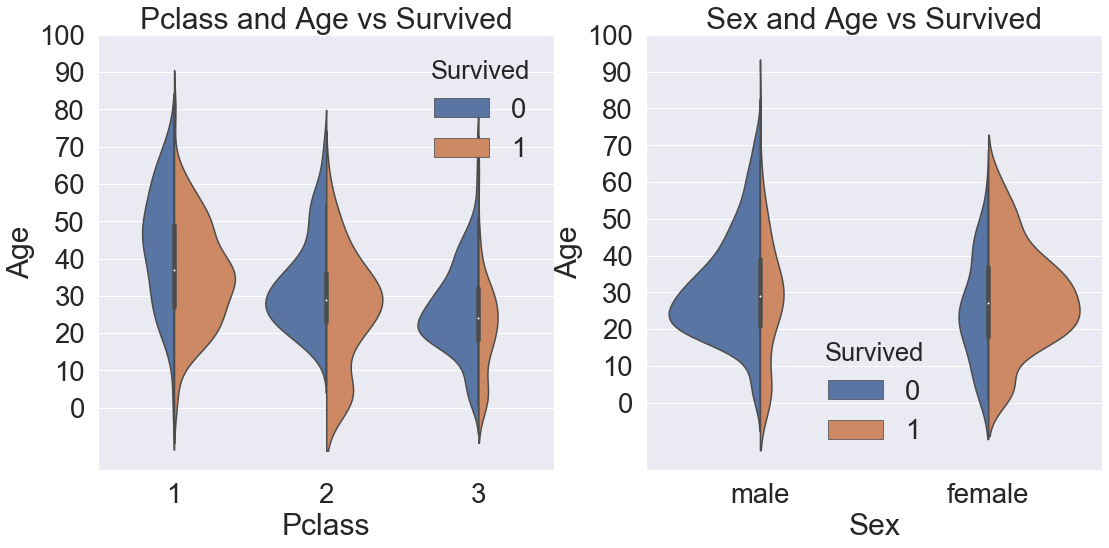

In [534]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count',split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))


sns.violinplot('Sex','Age', hue = 'Survived',data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

> - (왼쪽) : Pclass 별로 Age의 distribution 이 어떻게 다른지 생존여부에 따라 구분한 그래프
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있다.
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 했다.

### 6) Embarked

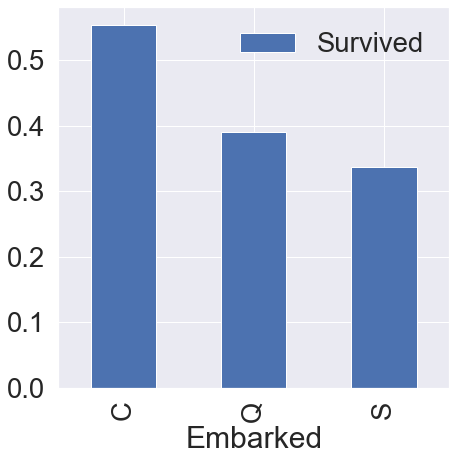

In [535]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

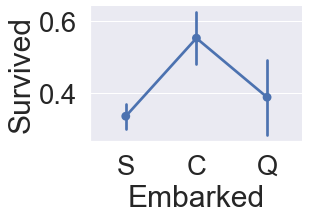

In [536]:
sns.factorplot('Embarked','Survived',data=df_train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

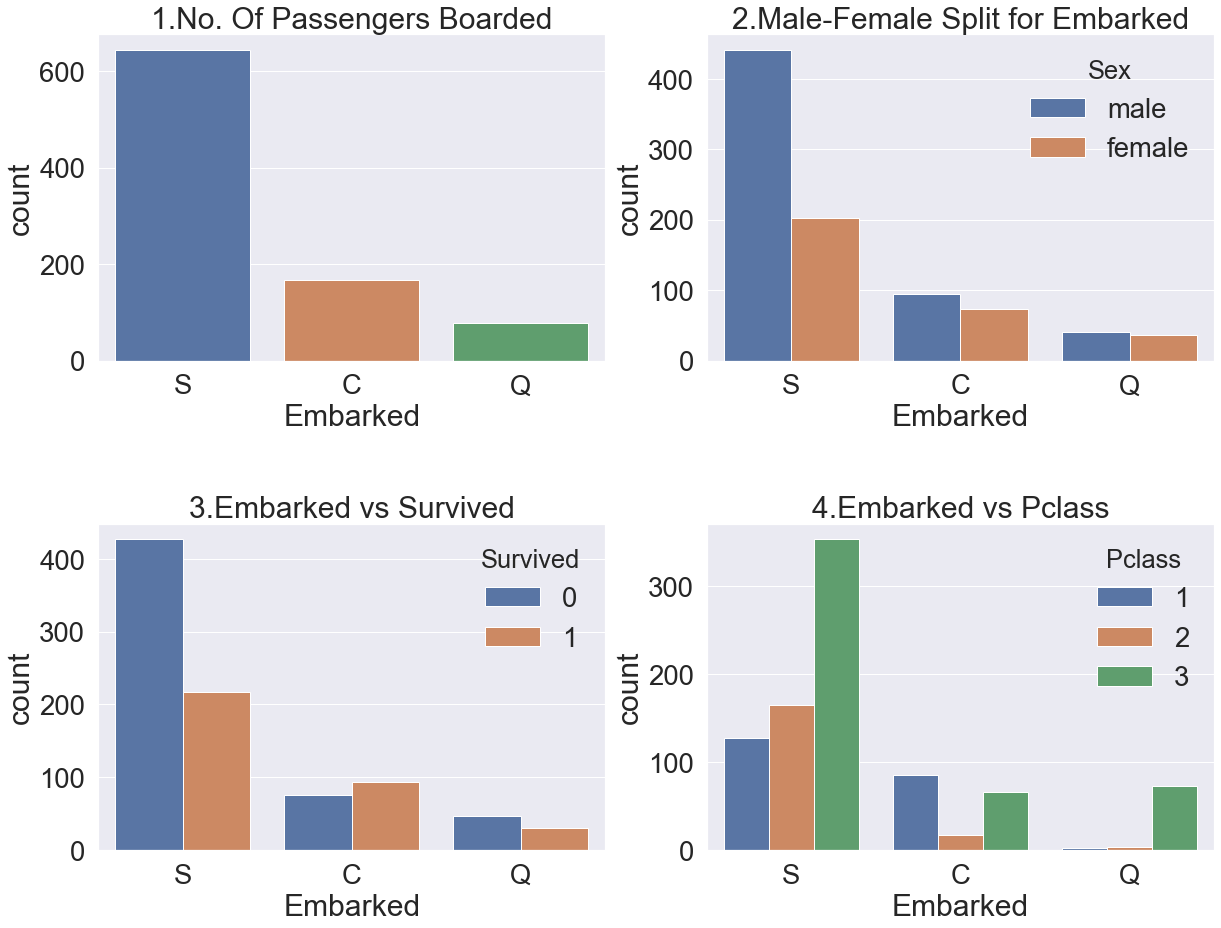

In [537]:
f, ax= plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('1.No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('2.Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('3.Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('4.Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)  # 그래프 간격 조정
plt.show()

> - 1. S에서 가장 많이 탐
- 2. C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많다.
- 3. S 경우 죽은 사람 많다.
- 4. Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

In [538]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

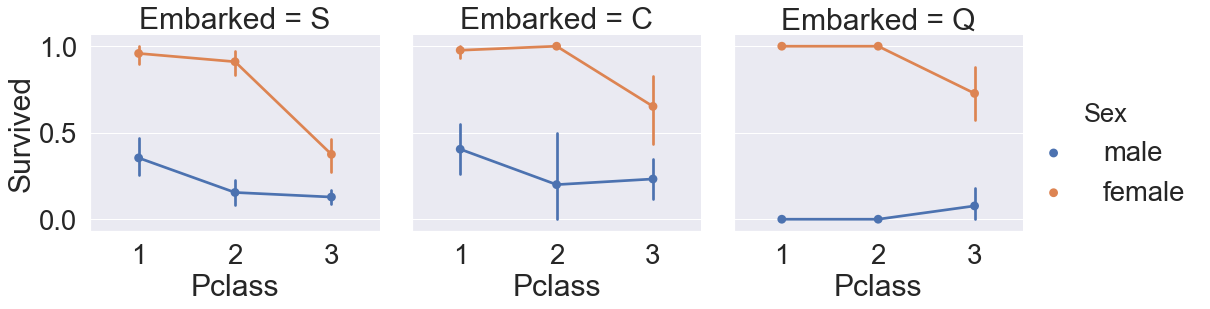

In [539]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_train)
plt.show()

### 7) Sibsp

In [540]:
pd.crosstab([df_train.SibSp],df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


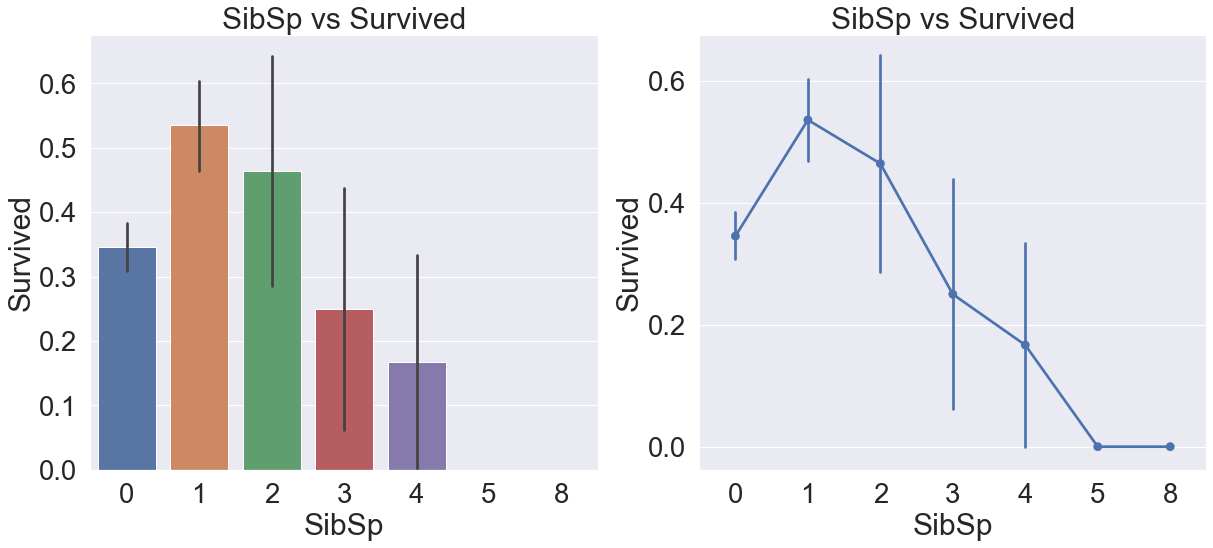

In [541]:
f,ax=plt.subplots(1,2,figsize=(20,8))
#  왼쪽
sns.barplot('SibSp','Survived',data=df_train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# 오른 쪽
sns.factorplot('SibSp','Survived',data=df_train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

### 8) Parch

In [542]:
pd.crosstab(df_train.Parch,df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


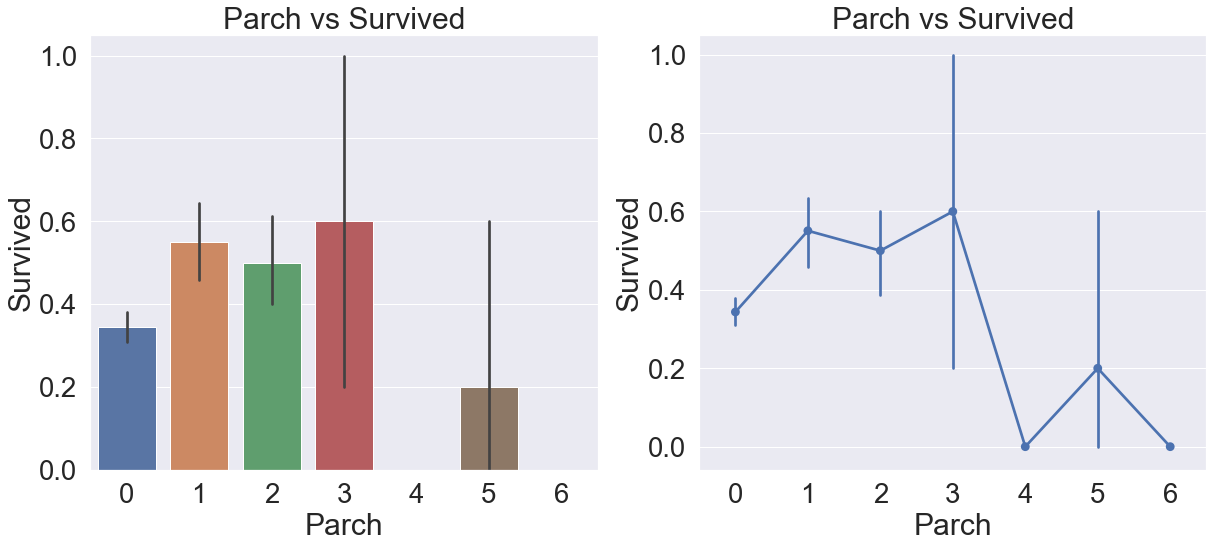

In [543]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived',data=df_train,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived',data=df_train,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

### 9) Fare

In [544]:
print('Highest Fare :',df_train['Fare'].max())
print('Lowest Fare :',df_train['Fare'].min())
print('Average Fare :',df_train['Fare'].mean())

Highest Fare : 512.3292
Lowest Fare : 0.0
Average Fare : 32.2042079685746


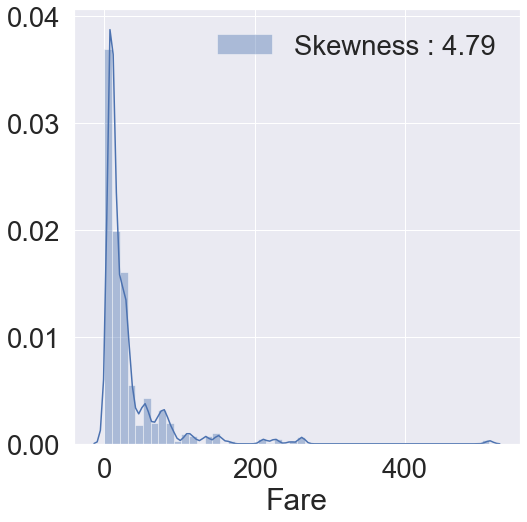

In [545]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 왜도(Skewness) : 왜도는 분포의 비대칭도를 나타내는 통계량이다. 
# 정규분포, T분포와 같이 대칭인 분포의 경우 왜도가 0이다. 

> - distribution이 매우 비대칭(high skewness)

## 4. 통계 분석

### 1) 상관 관계

In [546]:
# heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked']]

# colormap = plt.cm.RdBu
# plt.figure(figsize = (14,12))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
#            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

# del heatmap_data

> - Sex 와 Pclass 가 Survived 에 상관관계 있을 것 같음
- fare 와 Embarked도 Survived 에 상관관계 있을 것 같음

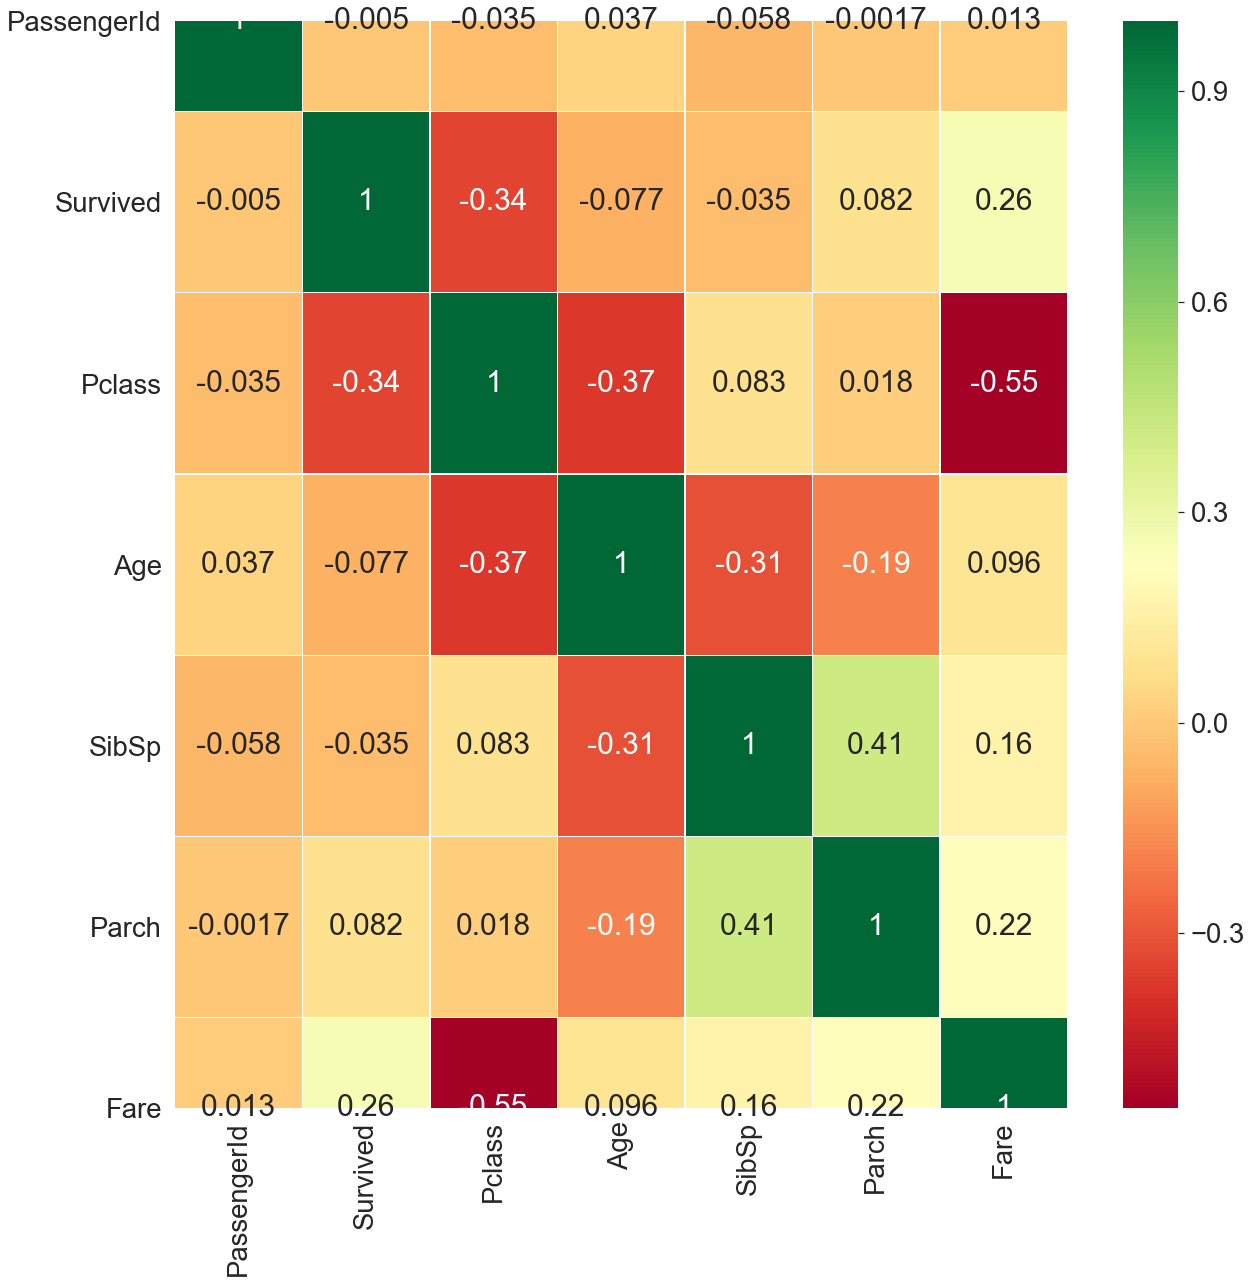

In [547]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

# [Data Preprocess, Feature Engineering]

In [548]:
IDtest = df_test["PassengerId"]

In [549]:
dataset =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

## 1. Fill Null
: Age, Cabin, Embarked, Fare

### 1) Age

Age에 영향 주는 column 찾기

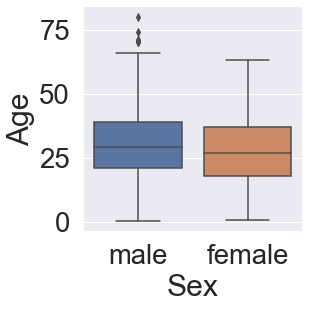

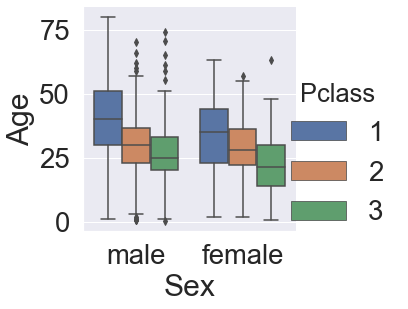

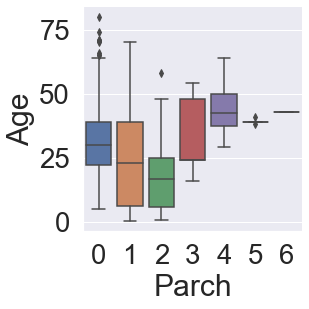

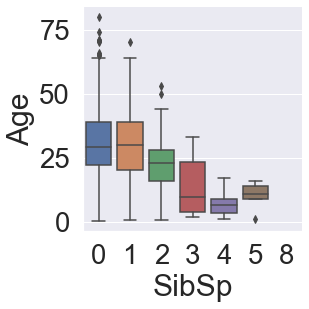

In [550]:
# Age vs Sex, Parch , Pclass and SibSP
g = sns.factorplot(y="Age",x="Sex",data=df_train,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=df_train,kind="box")
g = sns.factorplot(y="Age",x="Parch", data=df_train,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=df_train,kind="box")

> - Sex : 여자와 남자 모두 나이 분포가 비슷하다. => Age에 영향 X
- Pclass : 1클래스 사람들이 2,3클래스 사람들보다 나이가 많다.
- Parch  : 나이가 많을 수록 함께 탄 parents,children 수가 많다.
- SibSp : 나이가 적을 수록 함께 탄 siblings,spouses 수가 많다.

In [551]:
dataset.Age.isnull().sum()

263

#### 방법1) Name열 활용(Miss, Mrr, Mrs...)

- str method : data 를 string 으로 바꿔줌
- extract method : 거기에 정규표현식을 적용

In [552]:
dataset['Initial']= dataset.Name.str.extract('([A-Za-z]+)\.')

In [553]:
dataset.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs


In [554]:
pd.crosstab(dataset['Initial'], dataset['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [555]:
dataset['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [556]:
dataset.groupby('Initial').mean()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Initial,,,,,,,
Master,5.482642,36.008195,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.834533,42.667628,0.494340,616.992453,2.332075,0.652830,0.704301
Mr,32.556397,25.316303,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,50.686244,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,35.919231,0.153846,714.923077,1.615385,0.230769,0.111111


> 여성과 관계있는 Miss, Mr, Mrs 가 생존률이 높음

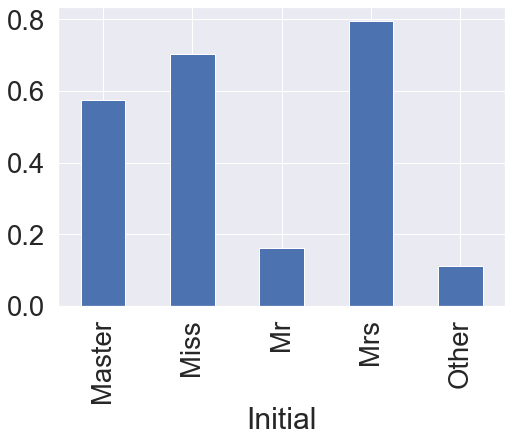

In [557]:
dataset.groupby('Initial')['Survived'].mean().plot.bar()

In [558]:
# train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 한다.
# Age의 평균을 이용해 Null value 를 채우기
dataset.groupby('Initial').Age.mean()

Initial
Master     5.482642
Miss      21.834533
Mr        32.556397
Mrs       37.034884
Other     44.923077
Name: Age, dtype: float64

In [559]:
dataset.loc[(dataset.Age.isnull())&(dataset.Initial=='Mr'),'Age'] = 33
dataset.loc[(dataset.Age.isnull())&(dataset.Initial=='Mrs'),'Age'] = 36
dataset.loc[(dataset.Age.isnull())&(dataset.Initial=='Master'),'Age'] = 5
dataset.loc[(dataset.Age.isnull())&(dataset.Initial=='Miss'),'Age'] = 22
dataset.loc[(dataset.Age.isnull())&(dataset.Initial=='Other'),'Age'] = 46

In [560]:
dataset.Age.isnull().any()

False

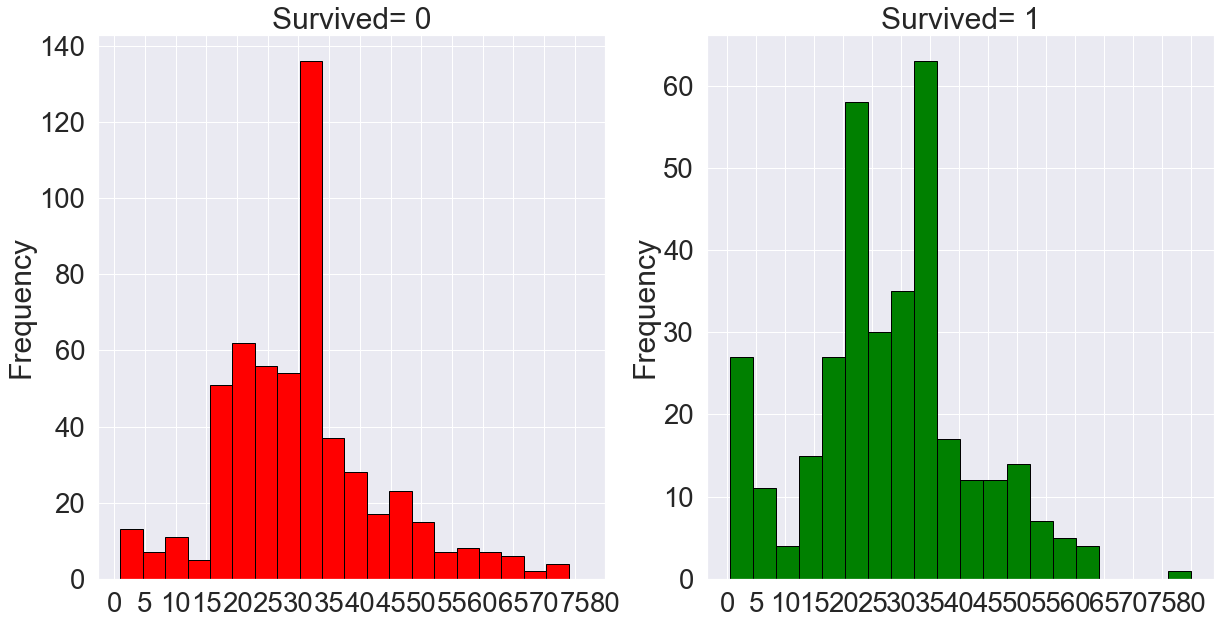

In [561]:
f, ax = plt.subplots(1,2, figsize=(20,10))

# 왼쪽
dataset[dataset['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

# 오른쪽
dataset[dataset['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

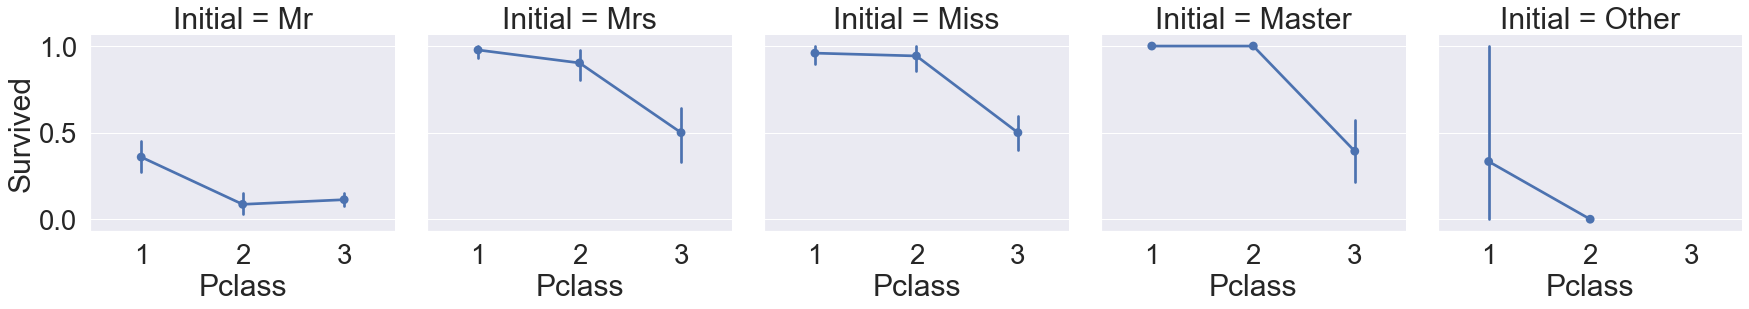

In [562]:
sns.factorplot('Pclass','Survived',col='Initial',data=dataset)
plt.show()

#### 방법2) Pclass, Parch, SibSp열 활용

In [563]:
# # Index of NaN age rows
# index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

# for i in index_NaN_age :
#     age_med = dataset["Age"].median()
#     age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
#     if not np.isnan(age_pred) :
#         dataset['Age'].iloc[i] = age_pred
#     else :
#         dataset['Age'].iloc[i] = age_med

In [564]:
# g = sns.factorplot(x="Survived", y = "Age",data = df_train, kind="box")
# g = sns.factorplot(x="Survived", y = "Age",data = df_train, kind="violin")

> 나이가 어린 사람들이 생존률이 더 높다.

#### 방법3) null data 가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣기

### 2) Cabin

In [565]:
dataset.Cabin.isnull().sum()

1014

In [566]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [567]:
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

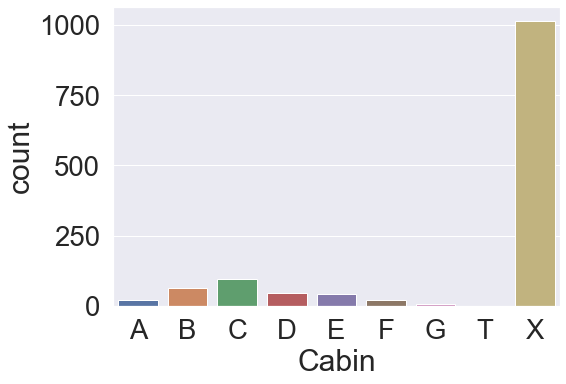

In [568]:
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

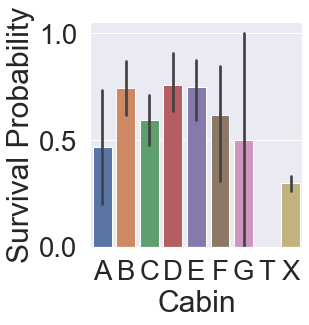

In [569]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

In [570]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

### 3) Embarked

In [571]:
dataset.Embarked.isnull().sum()

2

In [572]:
# Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로 Null 을 S로 채운다.
dataset['Embarked'].fillna('S', inplace=True)

In [573]:
# Null 이 사라졌는지 확인(any() : True 가 단하나라도 있을 시(Null이 한개라도 있을 시) True 를 반환) 

dataset['Embarked'].isnull().any()

False

### 4) Fare

In [574]:
dataset["Fare"].isnull().sum()

1

In [575]:
# df_test에 결측치가 1개밖에 없으니까 평균값으로 채우기
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

## 2. Outlier detection
"Age","SibSp","Parch","Fare" 에 대해서 이상치 탐지

### 1) Outlier detection

In [576]:
from collections import Counter

def detect_outliers(df,n,features):

    outlier_indices = []
    
    for col in features:
       
        Q1 = np.percentile(df[col], 25) # 1st quartile (25%)
        Q3 = np.percentile(df[col],75) # 3rd quartile (75%)
        
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # 위 조건에 맞는 아웃라이어 index 찾아서 각 리스트에 저장
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        #print(outlier_list_col)
        
        # 찾은 아웃라이어 index들을 outlier_indices에 다 저장
        outlier_indices.extend(outlier_list_col)
        #print(outlier_indices)
        
    # Counter함수를 이용해서 중복되는 아웃라이어 index를 카운팅하고 2개(n)보다 많을 경우 선택해서  multiple_outliers에 저장하고 반환
    outlier_indices = Counter  (outlier_indices)  
    # print(outlier_indices)
    
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   # [268, 305, 438, 587, 659, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


Outliers_to_drop = detect_outliers(df_train,2,["Age","SibSp","Parch","Fare"])

In [577]:
df_train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


> 16개의 아웃라이어 발견함(사이트에는 10개임?????)

### 2) Drop outliers

In [578]:
df_train = df_train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

### 3) 편향된 데이터 바로 잡기

In [579]:
# Fare 
# Fare columns 의 데이터 모두를 log 값 취하기

# test set 에 있는 nan value 를 평균값으로 치환
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

# log
dataset['Fare'] = dataset['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

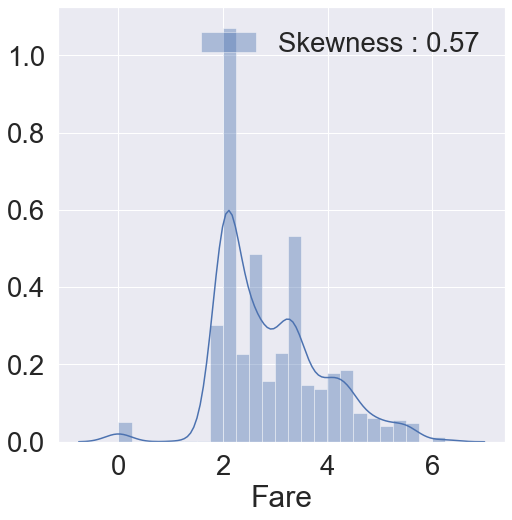

In [580]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(dataset['Fare'],color='b', label='Skewness : {:.2f}'.format(dataset['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

 > - 비대칭성이 많이 사라짐

## 3. Make New Columns

### 1) Parch + SibSp = Family_Size -> Alone

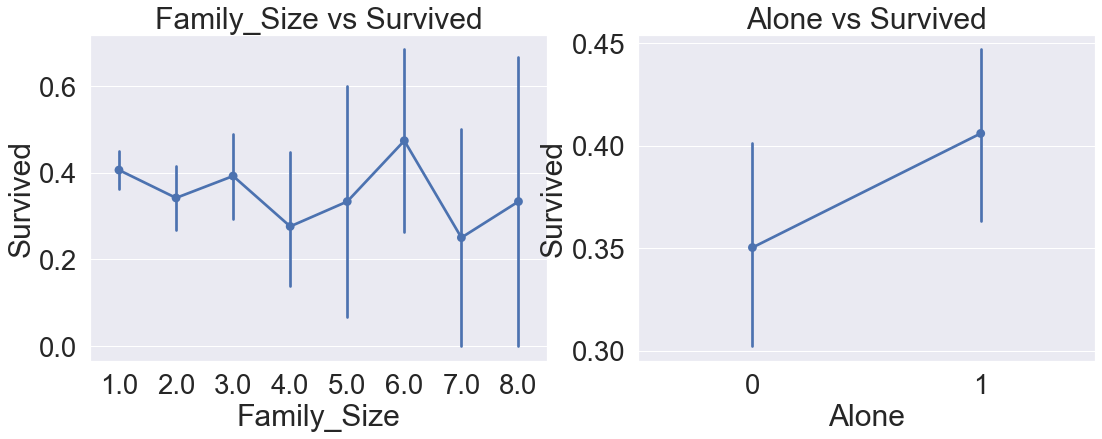

In [581]:
dataset['Family_Size']=0
dataset['Family_Size']=df_train['Parch']+df_train['SibSp'] + 1 # 가족 수
dataset['Alone']=0
dataset.loc[dataset.Family_Size==1,'Alone']=1   # 혼자 탔으면 1

f,ax=plt.subplots(1,2,figsize=(18,6))

sns.factorplot('Family_Size','Survived',data=dataset,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived',data=dataset,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

In [582]:
print('Maximum size of Family: ', dataset['Family_Size'].max())
print('Minimum size of Family: ', dataset['Family_Size'].min())

Maximum size of Family:  8.0
Minimum size of Family:  1.0


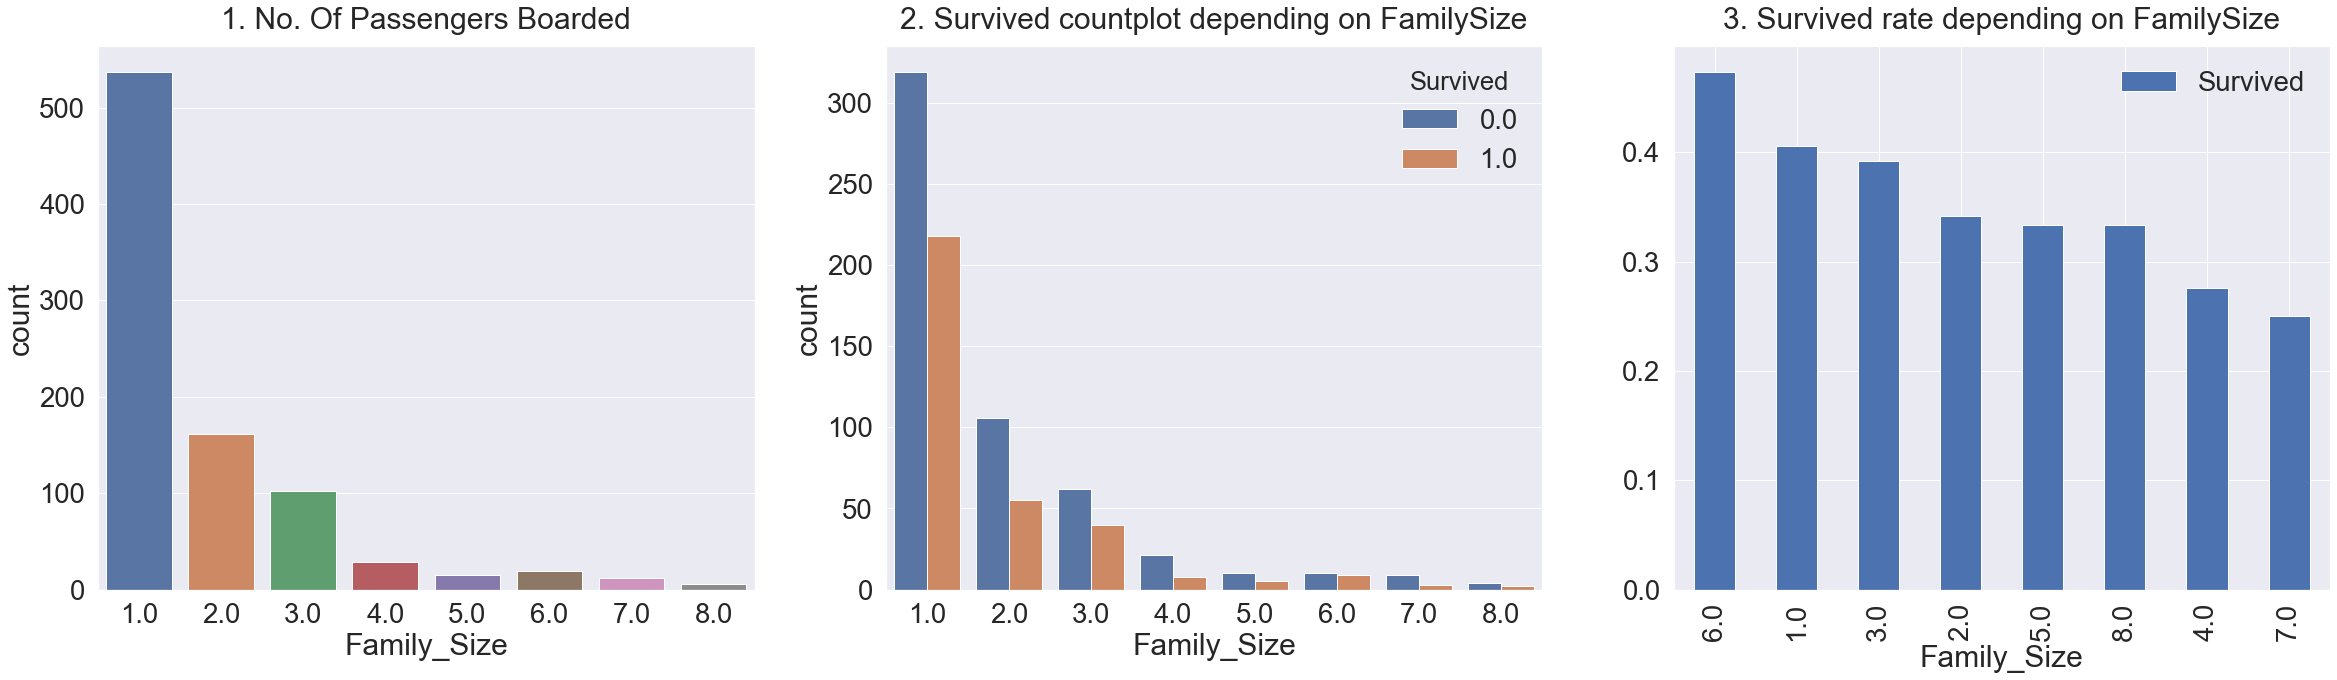

In [583]:
f, ax = plt.subplots(1,3, figsize=(40,10))

sns.countplot('Family_Size', data=dataset, ax=ax[0])
ax[0].set_title('1. No. Of Passengers Boarded', y=1.02)

sns.countplot('Family_Size', hue='Survived', data=dataset, ax=ax[1])
ax[1].set_title('2. Survived countplot depending on FamilySize',  y=1.02)

dataset[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('3. Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

> - 1. 대부분 1명이다.
- 2,3. 가족이 4명인 경우가 가장 생존률이 높음/ 가족 수가 너무 많거나 너무 적으면 생존률이 낮음 

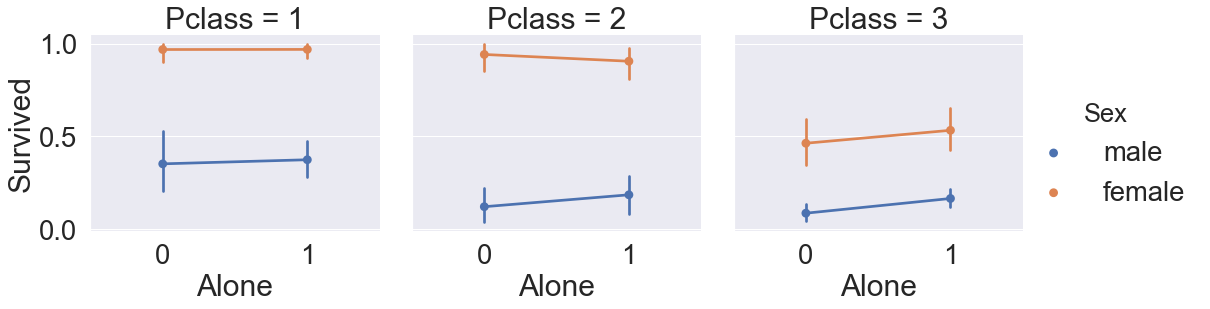

In [584]:
sns.factorplot('Alone','Survived',data=dataset, hue='Sex',col='Pclass')
plt.show()

> Pclass 3에서는 남자,여자 모두 생존률이 낮음

In [585]:
# Create new feature of family size
dataset['Single'] = dataset['Family_Size'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Family_Size'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Family_Size'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Family_Size'].map(lambda s: 1 if s >= 5 else 0)

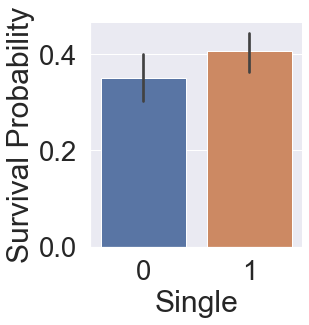

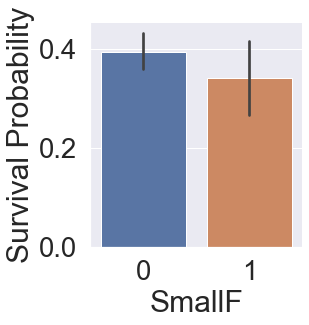

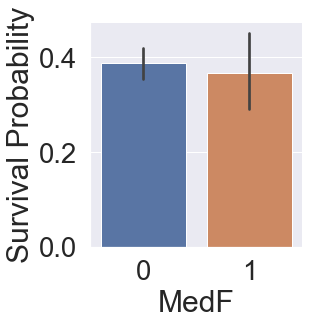

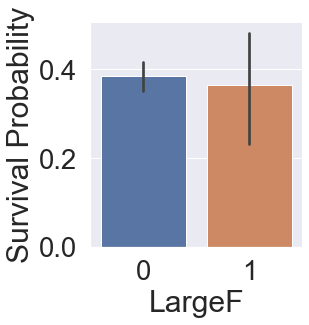

In [586]:
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

>  가족 수가 Small, Medium인 사람들이 생존확률이 더 높다.

### 2) Name

In [587]:
dataset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [588]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

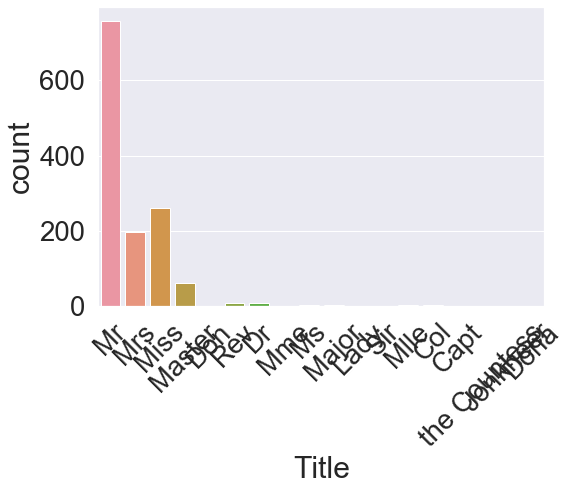

In [589]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

> Mr, Mrs, Miss, Master이 4가지 범주로만 나타내 보자

In [590]:
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

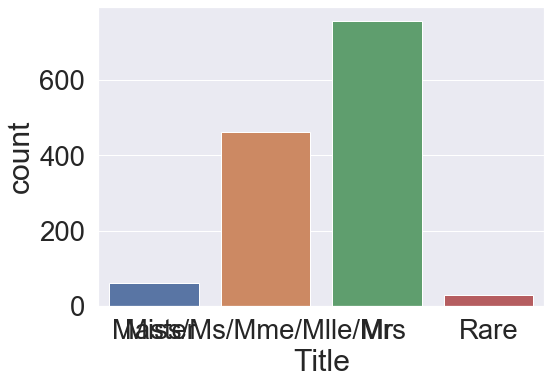

In [591]:
g = sns.countplot(dataset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

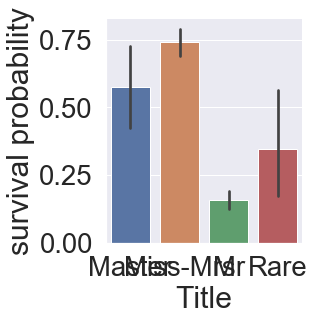

In [592]:
g = sns.factorplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [593]:
# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [594]:
dataset.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket', 'Initial', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_X', 'Family_Size', 'Alone', 'Single', 'SmallF', 'MedF', 'LargeF',
       'Title'],
      dtype='object')

## 4. Continuous to Categorical

### 1) Age

#### 방법1) loc 사용

In [595]:
# 10살 간격
dataset['Age_cat'] = 0
dataset.loc[dataset['Age']<10,'Age_cat'] = 0
dataset.loc[(10 <= dataset['Age'])&(dataset['Age'] < 20),'Age_cat'] = 1
dataset.loc[(20 <= dataset['Age']) & (dataset['Age'] < 30), 'Age_cat'] = 2
dataset.loc[(30 <= dataset['Age']) & (dataset['Age'] < 40), 'Age_cat'] = 3
dataset.loc[(40 <= dataset['Age']) & (dataset['Age'] < 50), 'Age_cat'] = 4
dataset.loc[(50 <= dataset['Age']) & (dataset['Age'] < 60), 'Age_cat'] = 5
dataset.loc[(60 <= dataset['Age']) & (dataset['Age'] < 70), 'Age_cat'] = 6
dataset.loc[70 <= dataset['Age'], 'Age_cat'] = 7

In [596]:
dataset['Age_cat'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_cat
3,436
2,395
1,143
4,135
0,90
5,70
6,32
7,8


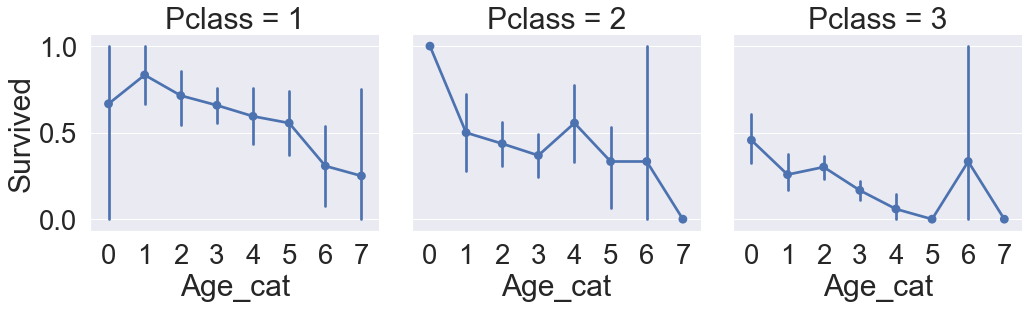

In [597]:
sns.factorplot('Age_cat','Survived',data=dataset,col='Pclass')
plt.show()

#### 방법2) apply 를 사용해 함수를 넣기

In [598]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
dataset['Age_cat_2'] = dataset['Age'].apply(category_age)

In [599]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (dataset['Age_cat'] == dataset['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [600]:
dataset.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)

#### 방법3) 

### 2) Fare

In [601]:
dataset['Fare_Range']=pd.qcut(dataset['Fare'],4)
dataset.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 2.066]",0.197309
"(2.066, 2.671]",0.303571
"(2.671, 3.443]",0.441048
"(3.443, 6.239]",0.6


In [602]:
dataset['Fare_cat']=0
dataset.loc[dataset['Fare']<=7.91,'Fare_cat']=0
dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare_cat']=1
dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare_cat']=2
dataset.loc[(dataset['Fare']>31)&(dataset['Fare']<=513),'Fare_cat']=3

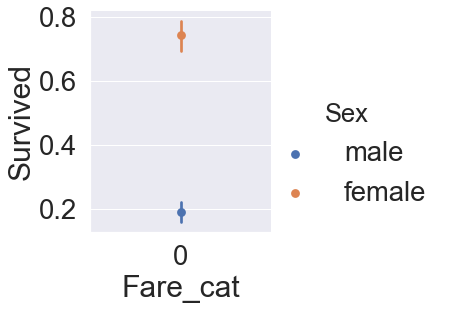

In [603]:
sns.factorplot('Fare_cat','Survived',data=dataset,hue='Sex')
plt.show()

> 요금을 많이 낼 수록 생존률 높아짐

In [604]:
dataset.drop(['Fare_Range'], axis=1, inplace=True)

## 5. String to Numerical

### 1) Sex

In [605]:
# dataset['Sex'].replace(['male','female'],[0,1],inplace=True)
dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1})

### 2) Embarked

In [606]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [607]:
dataset['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [608]:
# dataset['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
dataset['Embarked'] = dataset['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

### 3) Ticket

In [609]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

> 비슷한 Ticket 이름은 클래스와 생존에 영향을 줄 것이다.

In [610]:
# 접두사만 다루기, 접두사가 없는 경우는 X로 표시
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #접두사 파악
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

## 6. One-hot encoding
: (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것 -> 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding해준다.
- Labelencoder + OneHotencoder 이용
- get_dummies 를 사용

In [611]:
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

dataset.head()

,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Cabin_A,...,LargeF,Age_cat,Fare_cat,Title_0,Title_1,Title_2,Title_3,Em_0,Em_1,Em_2
0,1.981001,0,1,3,1,1,0.0,A5,Mr,0,...,0,2,0,0,0,1,0,0,0,1
1,4.266662,0,2,1,0,1,1.0,PC,Mrs,0,...,0,3,0,0,1,0,0,1,0,0
2,2.070022,0,3,3,0,0,1.0,STONO2,Miss,0,...,0,2,0,0,1,0,0,0,0,1
3,3.972177,0,4,1,0,1,1.0,X,Mrs,0,...,0,3,0,0,1,0,0,0,0,1
4,2.085672,0,5,3,1,0,0.0,X,Mr,0,...,0,3,0,0,0,1,0,0,0,1


In [612]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [613]:
# Create categorical values for Pclass
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

dataset.head()

,Fare,Parch,PassengerId,Sex,SibSp,Survived,Initial,Cabin_A,Cabin_B,Cabin_C,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,1.981001,0,1,1,1,0.0,Mr,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.266662,0,2,0,1,1.0,Mrs,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2.070022,0,3,0,0,1.0,Miss,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.972177,0,4,0,1,1.0,Mrs,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,2.085672,0,5,1,0,0.0,Mr,0,0,0,...,0,0,0,0,0,0,1,0,0,1


## 7. Drop columns

In [614]:
dataset.columns

Index(['Fare', 'Parch', 'PassengerId', 'Sex', 'SibSp', 'Survived', 'Initial',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_X', 'Family_Size', 'Alone', 'Single',
       'SmallF', 'MedF', 'LargeF', 'Age_cat', 'Fare_cat', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Em_0', 'Em_1', 'Em_2', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_X', 'Pc_1',
       'Pc_2', 'Pc_3'],
      dtype='object')

In [616]:
dataset.drop(['PassengerId','Initial', 'Fare','Alone'], axis=1, inplace=True) # 'SibSp', 'Parch'
dataset.head()

,Parch,Sex,SibSp,Survived,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,0,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [617]:
dataset.columns

Index(['Parch', 'Sex', 'SibSp', 'Survived', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X',
       'Family_Size', 'Single', 'SmallF', 'MedF', 'LargeF', 'Age_cat',
       'Fare_cat', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Em_0', 'Em_1',
       'Em_2', 'T_A', 'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA',
       'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP',
       'T_PPP', 'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS',
       'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ',
       'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_X', 'Pc_1', 'Pc_2', 'Pc_3'],
      dtype='object')

# [Single Model]

In [618]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

## 1. Split dataset

In [619]:
# X_train = df_train.drop('Survived', axis=1)
# Y_train = df_train['Survived']
# X_test = df_test.values

# x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=2018)

In [620]:
train_len = len(df_train)
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

In [621]:
train,test=train_test_split(train,test_size=0.3,random_state=0,stratify=df_train['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train[train.columns[1:]]
Y=train['Survived']

In [622]:
train_X.shape

(616, 66)

In [623]:
train_Y.shape

(616, 1)

In [624]:
test_X.shape

(265, 66)

In [625]:
test_Y.shape

(265, 1)

## 2. Model
train데이터 안에서만 train_test 나눠서 봄

### rbf-SVM(Radial Support Vector Machines)

In [626]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print("Accuracy for rbf SVM is",metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is 0.8339622641509434


### linear-SVM(Linear Support Vector Machine)

In [627]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8113207547169812


### Logistic Regression

In [628]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8264150943396227


### Decision Tree

In [629]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7962264150943397


### KNN(K-Nearest Neighbours)

In [630]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8150943396226416


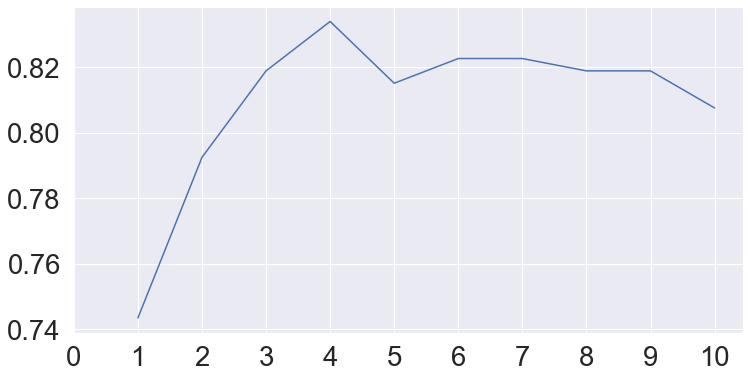

Accuracies for different values of n are: [0.74339623 0.79245283 0.81886792 0.83396226 0.81509434 0.82264151
 0.82264151 0.81886792 0.81886792 0.80754717] with the max value as  0.8339622641509434


In [631]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [632]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.18867924528301888


### Random Forests

In [633]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8


# [Advanced Model], [Stacking]

## 1. Cross Validation

In [634]:
# 10개의 파일로 쪼개서 테스트한다
kfold = StratifiedKFold(n_splits=10)

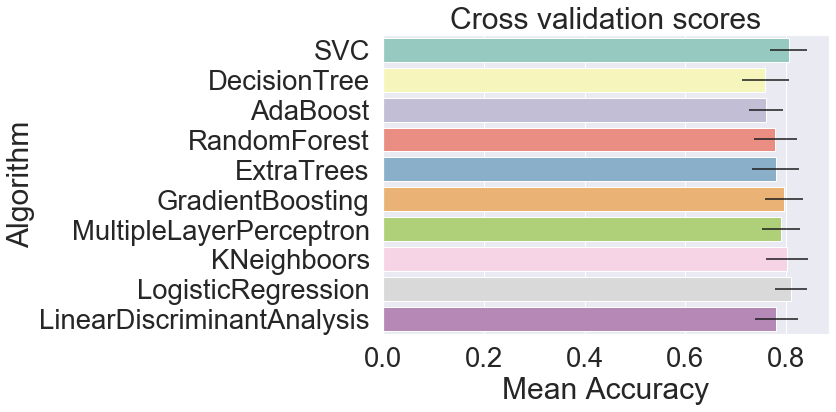

In [635]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_X, y = train_Y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [636]:
# from sklearn.model_selection import KFold #for K-fold cross validation
# from sklearn.model_selection import cross_val_score #score evaluation
# from sklearn.model_selection import cross_val_predict #prediction
# # 10개의 파일로 쪼개서 테스트한다.
# kfold = KFold(n_splits=10, random_state=22) 
# xyz=[]
# accuracy=[]
# std=[]
# classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
# models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
# for i in models:
#     model = i
#     cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")  # 검증 정확도
#     cv_result=cv_result
#     xyz.append(cv_result.mean())
#     std.append(cv_result.std())
#     accuracy.append(cv_result)
# new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
# new_models_dataframe2

In [637]:
# plt.subplots(figsize=(30,10))
# box=pd.DataFrame(accuracy,index=[classifiers])
# box.T.boxplot()

In [638]:
# new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
# plt.title('Average CV Mean Accuracy')
# fig=plt.gcf()
# fig.set_size_inches(8,5)
# plt.show()

### * Confusion Matrix

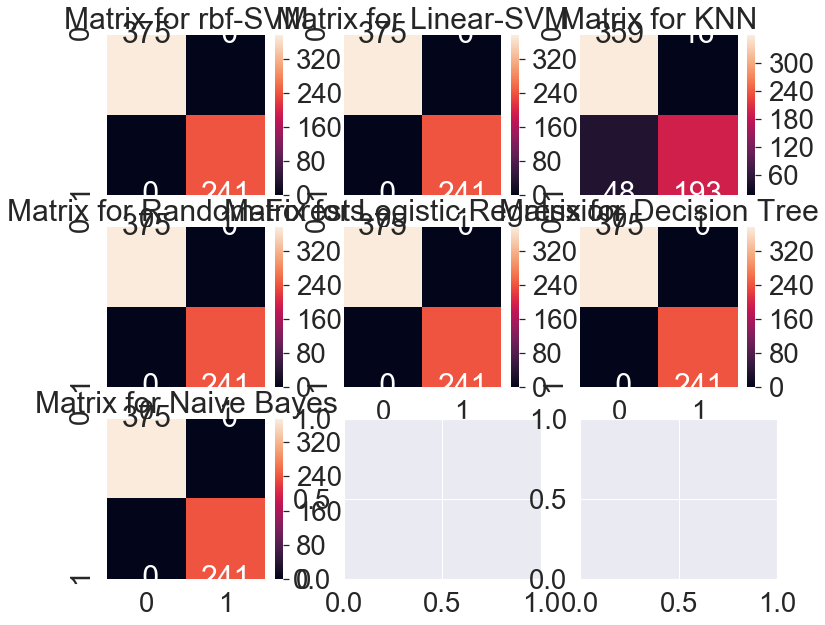

In [639]:
# 글씨 안 겹치게 하는 거??
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## 2. Ensembling

### 1) Voting Classifier

In [640]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8415094339622642
The cross validated score is 1.0


### 2) Bagging

#### Bagged KNN

In [641]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8264150943396227
The cross validated score for bagged KNN is: 0.8992025719154222


#### Bagged DecisionTree

In [642]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8037735849056604
The cross validated score for bagged Decision Tree is: 1.0


### 3) Boosting

#### AdaBoost(Adaptive Boosting)

In [643]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')

print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 1.0


In [644]:
# Hyper-Parameter Tuning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]

hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1.0
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished


> % (n_estimators=200 , learning_rate=0.05)

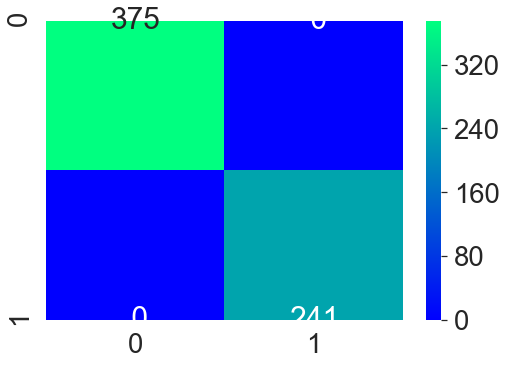

In [645]:
# Confusion Matrix for the Best Model
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

#### Stochastic Gradient Boosting

In [646]:
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')

print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 1.0


#### XGBoost

In [647]:
!pip install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [648]:
import xgboost as xg

xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')

print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 1.0


## 3. Hyperparameter tunning

In [649]:
from sklearn.model_selection import GridSearchCV

### 1) Adaboost

In [650]:
# 1. 빈 모델을 만들고
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

# 2. 원하는 파라미터를 dict형태로 만들어놓고
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
# 3. GridSearchCV()안에 위에서 만든 것들 다 넣어주고 모델을 만든다.
### scoring ###
##  Classification일때 : 'accuracy','f1'
##  Regression 일때 :  'neg_mean_squared_error','r2'...
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)




# 4. 만들어진 모델로 fit하고, 최적의 파라미터를 찾는다.
gsadaDTC.fit(train_X,train_Y)


ada_best = gsadaDTC.best_estimator_ # 최적의 파라미터로된 모델 인자

# Best parameter
gsadaDTC.best_params_

# Best score
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    1.9s finished


0.7954545454545454

### 2) ExtraTrees

In [651]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(train_X,train_Y)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   17.4s finished


0.8068181818181818

### 3) RFC Parameters tunning 

In [652]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(train_X,train_Y)

RFC_best = gsRFC.best_estimator_



# Best score
gsRFC.best_score_  # 교차 검증된 점수

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   17.7s finished


0.8116883116883117

### 4) Gradient boosting tunning

In [653]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(train_X,train_Y)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   48.5s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.3min finished


0.7808441558441559

### 5) SVC classifier

In [654]:
from sklearn.svm import SVC
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(train_X,train_Y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   10.5s finished


0.8165584415584416

In [655]:
# from sklearn.model_selection import GridSearchCV

# C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
# gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# kernel=['rbf','linear']
# hyper={'kernel':kernel,'C':C,'gamma':gamma}
# gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
# gd.fit(X,Y)
# print(gd.best_score_)
# print(gd.best_estimator_)

### 6) Random Forests

In [656]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
1.0
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    7.5s finished


 > - Rbf_svm : 83% (C=0.6, gamma=0.1)
- RandomForest : 80% (n_estimators=200)

## 4. Plot learning curves

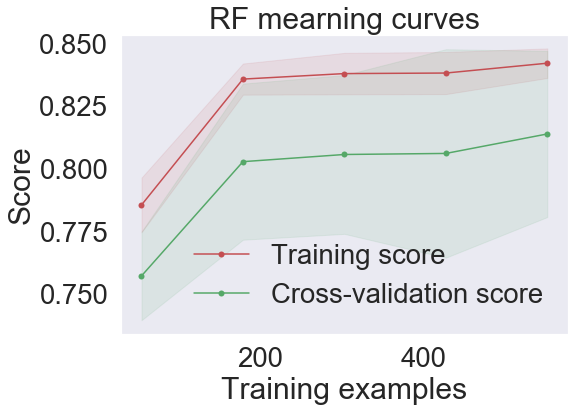

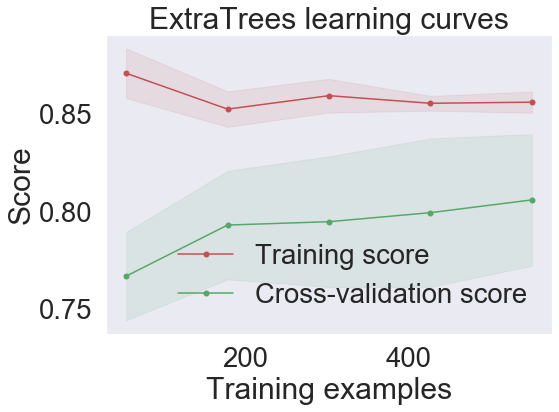

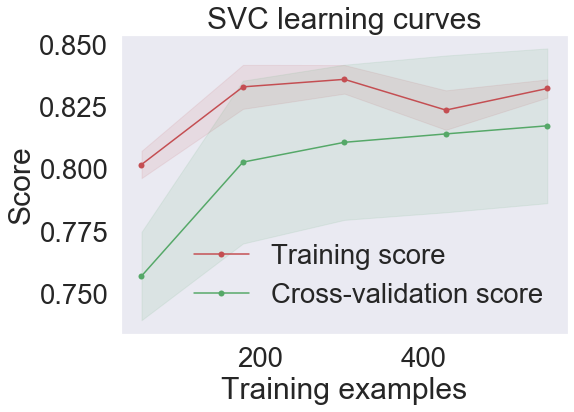

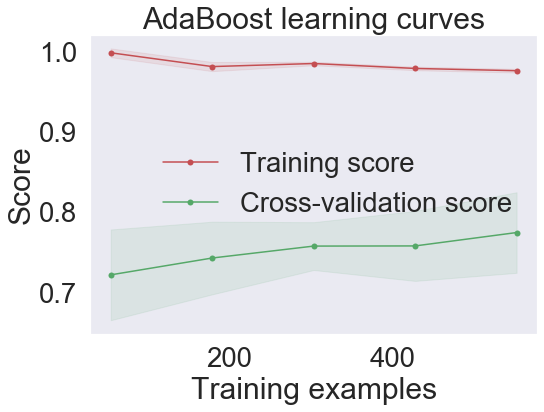

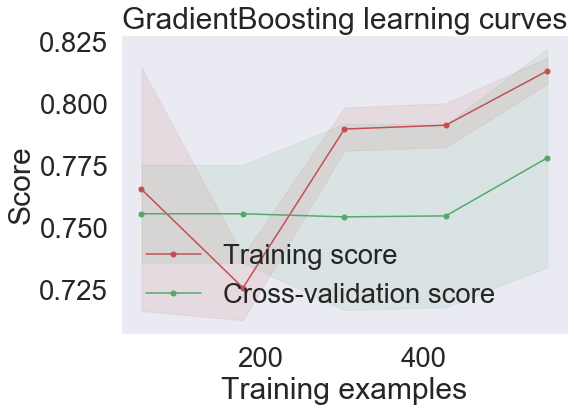

In [657]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",train_X,train_Y,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",train_X,train_Y,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",train_X,train_Y,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",train_X,train_Y,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",train_X,train_Y,cv=kfold)

> Adaboost classifiers tend to overfit the training set

## 5. Feature importance

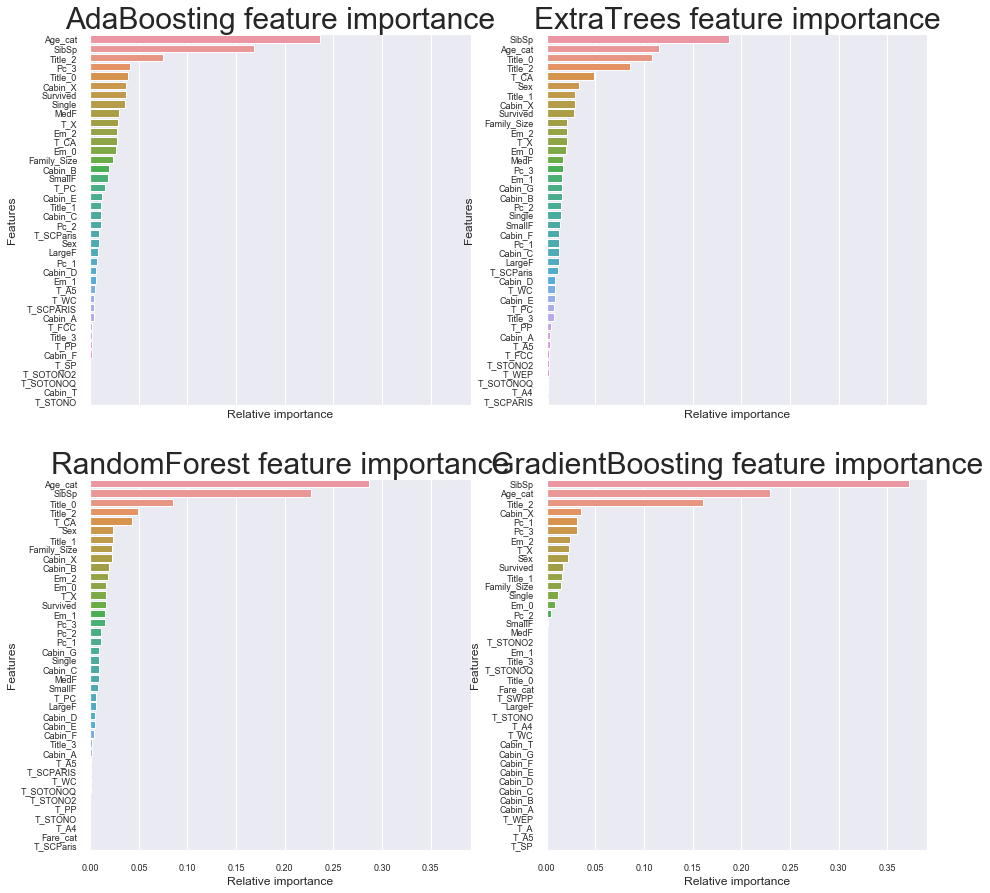

In [658]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=train_X.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

> Age, the Sex, the family size and the social standing of the passengers more than the location in the boat

In [659]:
# f,ax=plt.subplots(2,2,figsize=(15,12))
# model=RandomForestClassifier(n_estimators=500,random_state=0)
# model.fit(X,Y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
# ax[0,0].set_title('Feature Importance in Random Forests')
# model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
# model.fit(X,Y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
# ax[0,1].set_title('Feature Importance in AdaBoost')
# model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
# model.fit(X,Y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
# ax[1,0].set_title('Feature Importance in Gradient Boosting')
# model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
# model.fit(X,Y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
# ax[1,1].set_title('Feature Importance in XgBoost')
# plt.show()

In [660]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

ValueError: Number of features of the model must match the input. Model n_features is 66 and input n_features is 67 

##### Ensemble modeling_Combining models

VotingClassifier : 소프트 보팅 / 하드 보팅를 구현해 주는 거

In [661]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(train_X, train_Y)

## 6. Predict

In [662]:
# submission = pd.read_csv('data/gender_submission.csv')
# submission.head()

In [663]:
# # testset 에 대하여 예측을 하고, 결과를 csv 파일로 저장
# prediction = model.predict(X_test)
# submission['Survived'] = prediction

# submission.to_csv('./my_first_submission.csv', index=False)

In [664]:
test_Survived = pd.Series(votingC.predict(test_X), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)